In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle
from scipy.optimize import shgo
from mpl_toolkits.mplot3d import Axes3D

import topo_generic as topo
import JHD
import importlib
importlib.reload(topo)
importlib.reload(JHD)

%matplotlib inline
#%matplotlib widget  ## better to use this for interactive plot with jupyter lab

# Energy spectrum (fig4.b)



Energy spectrum is plotted for an asymmetric JHD, so the degeneracies are not along $\phi_L=\phi_R$.
The function cut() allows to plot the energy spectrum along any linear combination of $\phi_L$ and $\phi_R$.

In [2]:
#return a vector of phiL phiR along a direction given by param
def cut(slope,offset,phiLmin,phiLmax,dim):
    length=phiLmax-phiLmin
    phiLlist=np.zeros([dim])
    phiRlist=np.zeros([dim])
    for i in range(dim):
        phiLlist[i]=phiLmin+length*i/(dim-1)
        phiRlist[i]=(phiLmin+length*i/(dim-1))*slope + offset 
    return phiLlist, phiRlist

## $\phi_B=0$

**compute spectrum**

==> can be skipped by loading data below

In [7]:
# %%time
N=13
nbands=2

#init all param to base value
Ej,Ec=1,1

ng=0.259775456
ng1=ng2=ng
asym=[1,0.8,1.1,0.9,1.2]

phiB=0

slope=0.719548004
offset=0.881065915
dim=1501
phiLmin=0
phiLmax=2*np.pi
phiLlist,phiRlist=cut(slope,offset,phiLmin,phiLmax,dim)


E1=np.zeros([nbands,dim])
for i in range(dim):
    phiL=phiLlist[i]
    phiR=phiRlist[i]
    param=[N,Ej,Ec,ng1,ng2,phiL,phiR,phiB,asym]
    H=JHD.getH(param)

    E1[:,i],V=topo.compute_ev(H,nbands)

**load data**

In [ ]:
# with open('fig4_data/JHD_fig4_spectrum_1.pkl', 'wb') as outfile:
#     pickle.dump(E1,outfile)

In [3]:
with open('fig4_data/JHD_fig4_spectrum_1.pkl', 'rb') as outfile:
    E1=pickle.load(outfile)

**plot data**

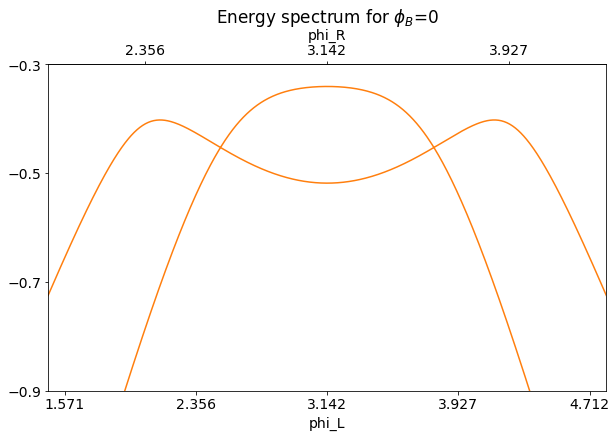

In [8]:
def LtoR(x):
    return slope*x+offset
def RtoL(x):
    return (x-offset)/slope

slope=0.719548004
offset=0.881065915
dim=1501
phiLmin=0
phiLmax=2*np.pi
phiLlist,phiRlist=cut(slope,offset,phiLmin,phiLmax,dim)
Ec=Ej=1
plt.close('all')
fig,ax=plt.subplots(figsize=(10,6))
plt.title('Energy spectrum for $\phi_B$=0')
plt.rcParams.update({'font.size': 14})

alpha=1
lw=2
for i in range(2):
    plt.plot(phiLlist,E1[i]/np.sqrt(2*Ec*Ej),color='tab:orange')
    
plt.xticks(np.arange(0,(9/4)*np.pi,np.pi/4))    

secax = ax.secondary_xaxis('top', functions=(LtoR,RtoL))
secax.set_xlabel('phi_R')
secax.set_ticks(np.arange(0,(9/4)*np.pi,np.pi/4))

plt.xlabel('phi_L')
plt.xlim(left=np.pi/2-0.1,right=3*np.pi/2+0.1)

ymin,ymax=-0.9,-0.3
plt.ylim(bottom=ymin,top=ymax)
plt.yticks(np.arange(ymin,ymax,0.2))
plt.show()

## $\phi_B=0.9$

**compute spectrum**

==> can be skipped by loading data below

In [9]:
# %%time
N=13
nbands=2

#init all param to base value
Ej,Ec=1,1

ng=0.254116991
ng1=ng2=ng
asym=[1,0.8,1.1,0.9,1.2]

phiB=0.9

slope=0.719548004
offset=0.651269121

dim=1501
phiLmin=0
phiLmax=2*np.pi
phiLlist,phiRlist=cut(slope,offset,phiLmin,phiLmax,dim)


E2=np.zeros([nbands,dim])
for i in range(dim):
    phiL=phiLlist[i]
    phiR=phiRlist[i]
    param=[N,Ej,Ec,ng1,ng2,phiL,phiR,phiB,asym]
    H=JHD.getH(param)

    E2[:,i],V=topo.compute_ev(H,nbands)

**load data**

In [ ]:
# with open('fig4_data/JHD_fig4_spectrum_2.pkl', 'wb') as outfile:
#     pickle.dump(E2,outfile)

In [5]:
with open('fig4_data/JHD_fig4_spectrum_2.pkl', 'rb') as outfile:
    E2=pickle.load(outfile)

**plot data**

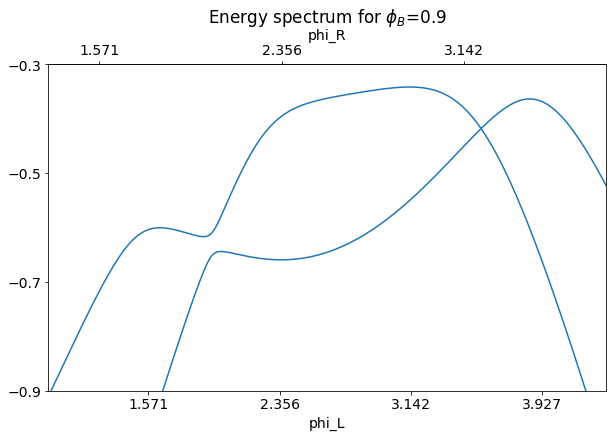

In [11]:
def LtoR(x):
    return slope*x+offset
def RtoL(x):
    return (x-offset)/slope

slope=0.719548004
offset=0.651269121

dim=1501
phiLmin=0
phiLmax=2*np.pi
phiLlist,phiRlist=cut(slope,offset,phiLmin,phiLmax,dim)
Ec=Ej=1

fig,ax=plt.subplots(figsize=(10,6))

plt.title('Energy spectrum for $\phi_B$=0.9')
for i in range(2):
    plt.plot(phiLlist,E2[i]/np.sqrt(2*Ec*Ej),color='tab:blue')
plt.rcParams.update({'font.size': 14})

plt.xticks(np.arange(0,(9/4)*np.pi,np.pi/4))    

secax = ax.secondary_xaxis('top', functions=(LtoR,RtoL))
secax.set_xlabel('phi_R')
secax.set_ticks(np.arange(0,(9/4)*np.pi,np.pi/4))

plt.xlabel('phi_L')
plt.xlim(left=np.pi/2-0.6,right=3*np.pi/2-0.4)

ymin,ymax=-0.9,-0.3
plt.ylim(bottom=ymin,top=ymax)
plt.yticks(np.arange(ymin,ymax,0.2))
plt.show()

# Degeneracy in 3D BZ

## $\phi_B=0$

Search 3D parameter space comprised of $\phi_L,\phi_R,n_{g1}=n_{g2}=n_g$

Do it in asymmetric case of figure 4

In [ ]:
%%time

[N,Ec,Ej]=[11,1,1]
asym=[1,0.8,1.1,0.9,1.2]

tol=1e-8

phiB=0

philist=[0,np.pi-0.1,np.pi,np.pi+0.1,2*np.pi]
dimphi=len(philist)

nglist=[0,0.49,0.51,1]
dimng=len(nglist)

deg_gap_1=[]
deg_pos_1=[]

param=[N,Ej,Ec,phiB,asym,tol]
for ing,ng in enumerate(nglist):
    for iphiL,phiL in enumerate(philist):
        for iphiR,phiR in enumerate(philist):
            if iphiL==0 or iphiR==0 or ing==0: continue

            bnds=((philist[iphiL-1],philist[iphiL]), (philist[iphiR-1],philist[iphiR]), (nglist[ing-1],nglist[ing]) )

            temp_deg=shgo(JHD.minimize_phiL_phiR_ng,bnds,args=param, \
                          n=50, iters=6, sampling_method='sobol', \
                          minimizer_kwargs={'method':'SLSQP', 'options':{'options':{'ftol':1e-8, 'eps':1e-10, 'maxiter':100}}}, \
                          options={'ftol':1e-8, 'maxtime':60, 'local_iter':10} )

            for ideg in range(len(temp_deg.funl)):
                if temp_deg.funl[ideg]<1e-6:
                    deg_gap_1.append(temp_deg.funl[ideg])
                    deg_pos_1.append(temp_deg.xl[ideg])
                    print(f'gap: {temp_deg.funl[ideg]} \t phiLR: {temp_deg.xl[ideg]}')

In [21]:
# with open('fig4_data/JHD_fig4_cube_1.pkl', 'wb') as outfile:
#     pickle.dump([deg_gap_1,deg_pos_1],outfile)

**Load data**

In [22]:
with open('fig4_data/JHD_fig4_cube_1.pkl', 'rb') as outfile:
    [deg_gap_1,deg_pos_1]=pickle.load(outfile)

**Plot degeneracies in 3D parameter space**

In [41]:
deg_pos_1=np.array(deg_pos_1)
print(f'for phi_B={0}, degeneracies are located at:')
for i in range(len(deg_pos_1)):
    print(f'\tng1={deg_pos_1[i,0]:3f},\t ng2={deg_pos_1[i,1]:3f},\t phi_X={deg_pos_1[i,2]:3f}')

for phi_B=0, degeneracies are located at:
	ng1=2.502603,	 ng2=2.681809,	 phi_X=0.259773
	ng1=3.780583,	 ng2=3.601377,	 phi_X=0.259773
	ng1=2.502603,	 ng2=2.681809,	 phi_X=0.740227
	ng1=3.780583,	 ng2=3.601377,	 phi_X=0.740227


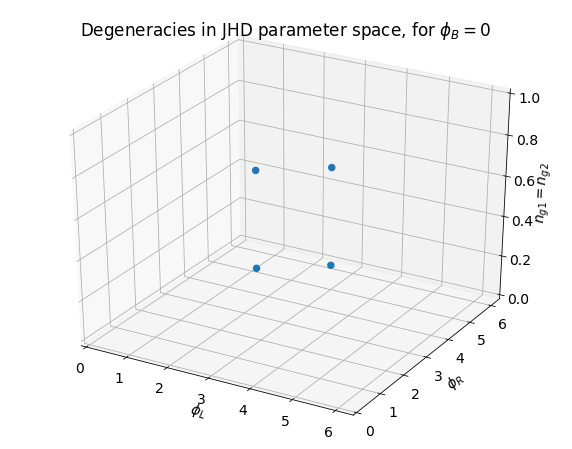

In [24]:
deg_pos_1=np.array(deg_pos_1)

fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})

ax = fig.add_subplot(111, projection='3d')
plt.title('Degeneracies in JHD parameter space, for $\phi_B=0$')
ax.scatter(deg_pos_1[:,0],deg_pos_1[:,1],deg_pos_1[:,2],alpha=1,lw=3)
ax.set_xlim([0,2*np.pi])
ax.set_ylim([0,2*np.pi])
ax.set_zlim([0,1])
ax.set_xlabel('$\phi_L$')
ax.set_ylabel('$\phi_R$')
ax.set_zlabel('$n_{g1}=n_{g2}$')
plt.show()

## $\phi_B=0.9$

In [ ]:
%%time

[N,Ec,Ej]=[11,1,1]
asym=[1,0.8,1.1,0.9,1.2]

tol=1e-8

phiB=0.9

philist=[0,np.pi-0.1,np.pi,np.pi+0.1,2*np.pi]
dimphi=len(philist)

nglist=[0,0.49,0.51,1]
dimng=len(nglist)

deg_gap_2=[]
deg_pos_2=[]

param=[N,Ej,Ec,phiB,asym,tol]
for ing,ng in enumerate(nglist):
    for iphiL,phiL in enumerate(philist):
        for iphiR,phiR in enumerate(philist):
            if iphiL==0 or iphiR==0 or ing==0: continue

            bnds=((philist[iphiL-1],philist[iphiL]), (philist[iphiR-1],philist[iphiR]), (nglist[ing-1],nglist[ing]) )

            temp_deg=shgo(JHD.minimize_phiL_phiR_ng,bnds,args=param, \
                          n=50, iters=6, sampling_method='sobol', \
                          minimizer_kwargs={'method':'SLSQP', 'options':{'options':{'ftol':1e-8, 'eps':1e-10, 'maxiter':100}}}, \
                          options={'ftol':1e-8, 'maxtime':60, 'local_iter':10} )

            for ideg in range(len(temp_deg.funl)):
                if temp_deg.funl[ideg]<1e-6:
                    deg_gap_2.append(temp_deg.funl[ideg])
                    deg_pos_2.append(temp_deg.xl[ideg])
                    print(f'gap: {temp_deg.funl[ideg]} \t phiLR: {temp_deg.xl[ideg]}')

**Save/Load data**

In [30]:
# with open('fig4_data/JHD_fig4_cube_2.pkl', 'wb') as outfile:
#     pickle.dump([deg_gap_2,deg_pos_2],outfile)

In [31]:
with open('fig4_data/JHD_fig4_cube_2.pkl', 'rb') as outfile:
    [deg_gap_2,deg_pos_2]=pickle.load(outfile)

**Plot degeneracies in 3D parameter space**

In [40]:
deg_pos_2=np.array(deg_pos_2)
print(f'for phi_B={0.9}, degeneracies are located at:')
for i in range(len(deg_pos_2)):
    print(f'\tng1={deg_pos_2[i,0]:3f},\t ng2={deg_pos_2[i,1]:3f},\t phi_X={deg_pos_2[i,2]:3f}')

for phi_B=0.9, degeneracies are located at:
	ng1=3.563230,	 ng2=3.215184,	 phi_X=0.254116
	ng1=1.920385,	 ng2=2.065911,	 phi_X=0.421031
	ng1=1.920385,	 ng2=2.065911,	 phi_X=0.578969
	ng1=3.563230,	 ng2=3.215184,	 phi_X=0.745884


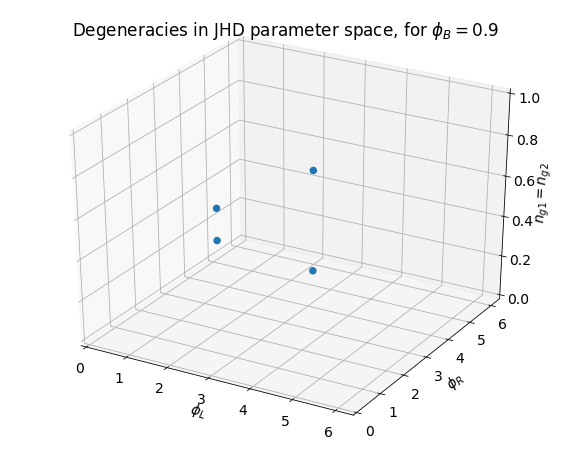

In [33]:
deg_pos_2=np.array(deg_pos_2)

fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})
ax = fig.add_subplot(111, projection='3d')
plt.title('Degeneracies in JHD parameter space, for $\phi_B=0.9$')
ax.scatter(deg_pos_2[:,0],deg_pos_2[:,1],deg_pos_2[:,2],alpha=1,lw=3)
ax.set_xlim([0,2*np.pi])
ax.set_ylim([0,2*np.pi])
ax.set_zlim([0,1])
ax.set_xlabel('$\phi_L$')
ax.set_ylabel('$\phi_R$')
ax.set_zlabel('$n_{g1}=n_{g2}$')
plt.show()

# Chern number

Compute Chern number as shown in fig4.d

## Generate data

Chern is computed by integrating the Berry curvature $B_{\phi_R,\phi_L}$ on a $\phi_L,\phi_R$ plane at fixed $\phi_B$ and $n_g$.

For a good accuracy, a fine $\phi_L,\phi_R$ grid is necessary. This requires a relatively long computation time (several hours to days).

Datas are available in the next part for $\phi_B=0.9$.

In [ ]:
%%time
N=9
nbands=7

#init all param to base value
Ej,Ec=1,1

asym=[1,0.8,1.1,0.9,1.2]


dimphi=301
phiList=np.linspace(0,2*np.pi,dimphi)

dimng=35
nglist=np.linspace(0,0.5,dimng)

phiB=0.9

Chern=np.zeros([dimng])

for ing,ng in enumerate(nglist):
    BC=np.zeros([dimphi,dimphi])
    for i,phiL in enumerate(phiList):
        for j,phiR in enumerate(phiList):
            paramH=[N,Ej,Ec,ng,ng,phiL,phiR,phiB,asym]
            H=JHD.getH(paramH)
            paramdH=[N,Ej,phiL,phiR,phiB,asym]
            dH=JHD.getdH_LR(paramdH)
            BC[i,j]=topo.compute_BC(H,dH,nbands)
    Chern[ing]=np.trapz( np.trapz(BC,phiList),phiList)/2/np.pi
    print(f'ng = {ng} \t Chern={Chern[ing]}')


## load computed data for $\phi_B=0.9$

Parameters used: phiB=0.9,N=9,nbands=7,dimphi=301,dimng=35,asym=[1,0.8,1.1,0.9,1.2]

In [34]:
#load computed Chern number for ng in [0,0.5]
with open('fig4_data/JHD_fig4_chern_phiB09.pkl', 'rb') as outfile:
    Chern=pickle.load(outfile)[0]

# mirror Chern for ng in [0.5,1]
Chern_=Chern[2,1:]
Chern=np.hstack((Chern[2],-Chern_[::-1]))

#global minus sign to follow convention defined in appendix A of https://arxiv.org/pdf/2009.03291.pdf
Chern=-Chern

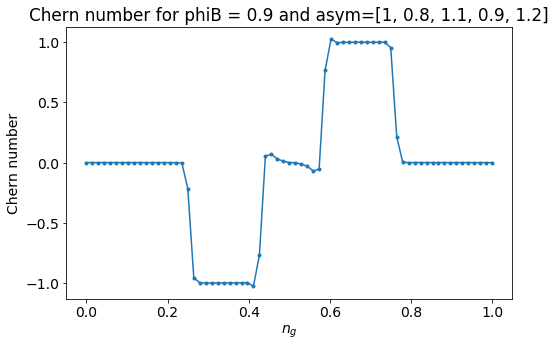

In [35]:
dimphi=301

#define nglist, and mirror for ng above 0.5
dimng=35
nglist=np.linspace(0,0.5,dimng)
temp=nglist+0.5
nglist=np.hstack((nglist,temp[1:]))

fig,ax=plt.subplots(figsize=(8,5))
plt.title(f'Chern number for phiB = {1.0*phiB:.4} and asym={asym}')
plt.rcParams.update({'font.size': 14})

plt.plot(nglist,Chern,'.-')

plt.xlabel('$n_g$')
plt.ylabel('Chern number')
plt.show()